In [1]:
!pip install pyspark matplotlib seaborn


In [16]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("BikeSalesAnalysis").getOrCreate()
file_path = "/content/bike_sales_india.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- State: string (nullable = true)
 |-- Avg Daily Distance (km): double (nullable = true)
 |-- Brand: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Price (INR): integer (nullable = true)
 |-- Year of Manufacture: integer (nullable = true)
 |-- Engine Capacity (cc): integer (nullable = true)
 |-- Fuel Type: string (nullable = true)
 |-- Mileage (km/l): double (nullable = true)
 |-- Owner Type: string (nullable = true)
 |-- Registration Year: integer (nullable = true)
 |-- Insurance Status: string (nullable = true)
 |-- Seller Type: string (nullable = true)
 |-- Resale Price (INR): double (nullable = true)
 |-- City Tier: string (nullable = true)

+--------------+-----------------------+-------------+-----------+-----------+-------------------+--------------------+---------+--------------+----------+-----------------+----------------+-----------+------------------+---------+
|         State|Avg Daily Distance (km)|        Brand|      Model|Price (INR)|Year of 

In [5]:
from pyspark.sql.functions import col, count
df.select([count(col(c)).alias(c) for c in df.columns]).show()

+-----+-----------------------+-----+-----+-----------+-------------------+--------------------+---------+--------------+----------+-----------------+----------------+-----------+------------------+---------+
|State|Avg Daily Distance (km)|Brand|Model|Price (INR)|Year of Manufacture|Engine Capacity (cc)|Fuel Type|Mileage (km/l)|Owner Type|Registration Year|Insurance Status|Seller Type|Resale Price (INR)|City Tier|
+-----+-----------------------+-----+-----+-----------+-------------------+--------------------+---------+--------------+----------+-----------------+----------------+-----------+------------------+---------+
|10000|                  10000|10000|10000|      10000|              10000|               10000|    10000|         10000|     10000|            10000|           10000|      10000|             10000|    10000|
+-----+-----------------------+-----+-----+-----------+-------------------+--------------------+---------+--------------+----------+-----------------+--------------

In [6]:
df.groupBy("Brand").count().orderBy("count", ascending=False).show(5)


+-------------+-----+
|        Brand|count|
+-------------+-----+
|     Kawasaki| 1291|
|       Yamaha| 1283|
|          KTM| 1272|
|Royal Enfield| 1253|
|         Hero| 1239|
+-------------+-----+
only showing top 5 rows



In [8]:
from pyspark.sql.functions import to_date, month
df = df.withColumn("Registration Year", to_date(df["Registration Year"], "yyyy"))
df = df.withColumn("Month", month(df["Registration Year"]))
df.groupBy("Month").count().orderBy("Month").show()


+-----+-----+
|Month|count|
+-----+-----+
|    1|10000|
+-----+-----+



In [9]:
pandas_df = df.toPandas()


<ipython-input-10-6d87a6b40cd3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Brand", y="count", data=brand_sales, palette="viridis")


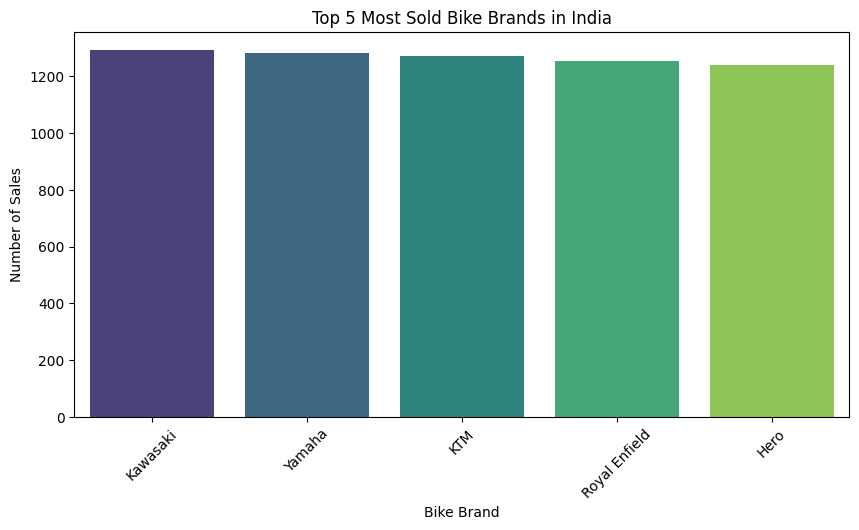

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 brands by sales count
brand_sales = df.groupBy("Brand").count().orderBy("count", ascending=False).limit(5).toPandas()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Brand", y="count", data=brand_sales, palette="viridis")
plt.title("Top 5 Most Sold Bike Brands in India")
plt.xlabel("Bike Brand")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()


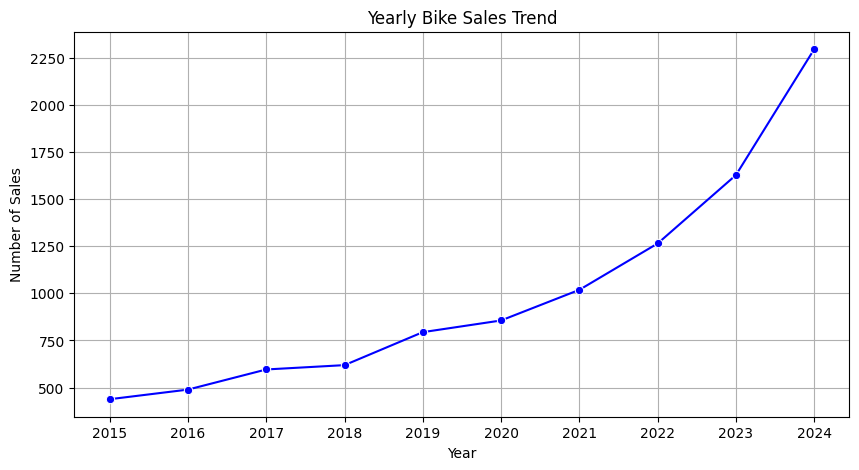

In [15]:
from pyspark.sql.functions import col

# Aggregate sales by year
yearly_sales = df.groupBy(col("Registration Year")).count().orderBy("Registration Year").toPandas()

# Plot yearly sales trend
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x="Registration Year", y="count", data=yearly_sales, marker="o", color="b")
plt.title("Yearly Bike Sales Trend")
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.grid(True)
plt.show()
